In [ ]:
!pip install sklearn
!pip install pandas
!pip install graphviz

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, log_loss
from sklearn import metrics
import graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Pre Analysis



In [8]:
data = pd.read_csv('Titanic.csv')

data = data[data['age'].notna()] #remove na
label_encoder = preprocessing.LabelEncoder()


data['pclass'] = label_encoder.fit_transform(data['pclass']) 
data['sex'] = label_encoder.fit_transform(data['sex'])

feature_columns = ['pclass', 'sex', 'age', 'sibsp'] #grab columns for step 2

y = data.survived
x = data[feature_columns]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # grab 80-20 splits
print(x_train.shape)


(836, 4)


##NEURAL NETWORK
 

In [9]:
#SGD and hidden layer
clf = MLPClassifier(solver='sgd', alpha=0.001, hidden_layer_sizes=(80, 18), random_state=1, activation='logistic', learning_rate_init=0.001) #logistic activation (i.e sigmoid)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

#adjust hidden layer sizes
clf = MLPClassifier(solver='sgd', alpha=0.001, hidden_layer_sizes=(45, 45), random_state=1, activation='logistic', learning_rate_init=0.001) #logistic activation (i.e sigmoid)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

#SGD vs adam
clf = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(45, 45), random_state=1, activation='logistic', learning_rate_init=0.001, max_iter=500) #logistic activation
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))

clf = MLPClassifier(solver='adam', alpha=0.001, hidden_layer_sizes=(18, 6), random_state=1, activation='logistic', learning_rate_init=0.01, max_iter=500) #logistic activation (i.e sigmoid)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.5666666666666667
0.5666666666666667
0.8
0.8047619047619048
[[105  14]
 [ 27  64]]


## Decision Tree


In [10]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 

print("Accuracy and other values")
print(classification_report(y_test, y_pred))
#^calcs the precision, recall, f1 values

tree_representation_text = tree.export_text(decision_tree, feature_names=feature_columns)
print(tree_representation_text) #prints a text tree







Test Accuracy: 0.7904761904761904
Confusion Matrix:
[[102  17]
 [ 27  64]]
Accuracy and other values
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       119
           1       0.79      0.70      0.74        91

    accuracy                           0.79       210
   macro avg       0.79      0.78      0.78       210
weighted avg       0.79      0.79      0.79       210

|--- sex <= 0.50
|   |--- pclass <= 1.50
|   |   |--- pclass <= 0.50
|   |   |   |--- age <= 8.00
|   |   |   |   |--- class: 0
|   |   |   |--- age >  8.00
|   |   |   |   |--- age <= 37.00
|   |   |   |   |   |--- age <= 35.50
|   |   |   |   |   |   |--- sibsp <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- sibsp >  0.50
|   |   |   |   |   |   |   |--- age <= 24.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  24.50
|   |   |   |   |   |   |   |   |--- age <= 26.00
|   |   |   |   |   |   |  

[42, 42, 35, 45, 41, 43, 41, 44, 45, 46, 45, 45, 44, 44, 45, 45, 44]


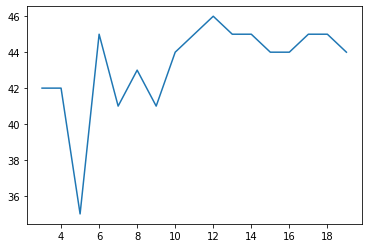

In [11]:
treesize = []
all_scores = []
misclassifications = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform k-fold cross validation (6)
    scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=6, n_jobs=4)
    treesize.append((i,scores.mean()))
    all_scores.append(scores.mean())
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    misclassifications.append(confusion_matrix(y_test, prediction)[0][1] + confusion_matrix(y_test, prediction)[1][0])

print(misclassifications)

plt.plot(range(3, 20), misclassifications)



The minimum number of misclassifications occurs at a tree size of 5. The number of misclassifications spikes at a larger tree size since overclassification would occur.

Test Accuracy: 0.8333333333333334
[[107  12]
 [ 23  68]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       119
           1       0.85      0.75      0.80        91

    accuracy                           0.83       210
   macro avg       0.84      0.82      0.83       210
weighted avg       0.83      0.83      0.83       210



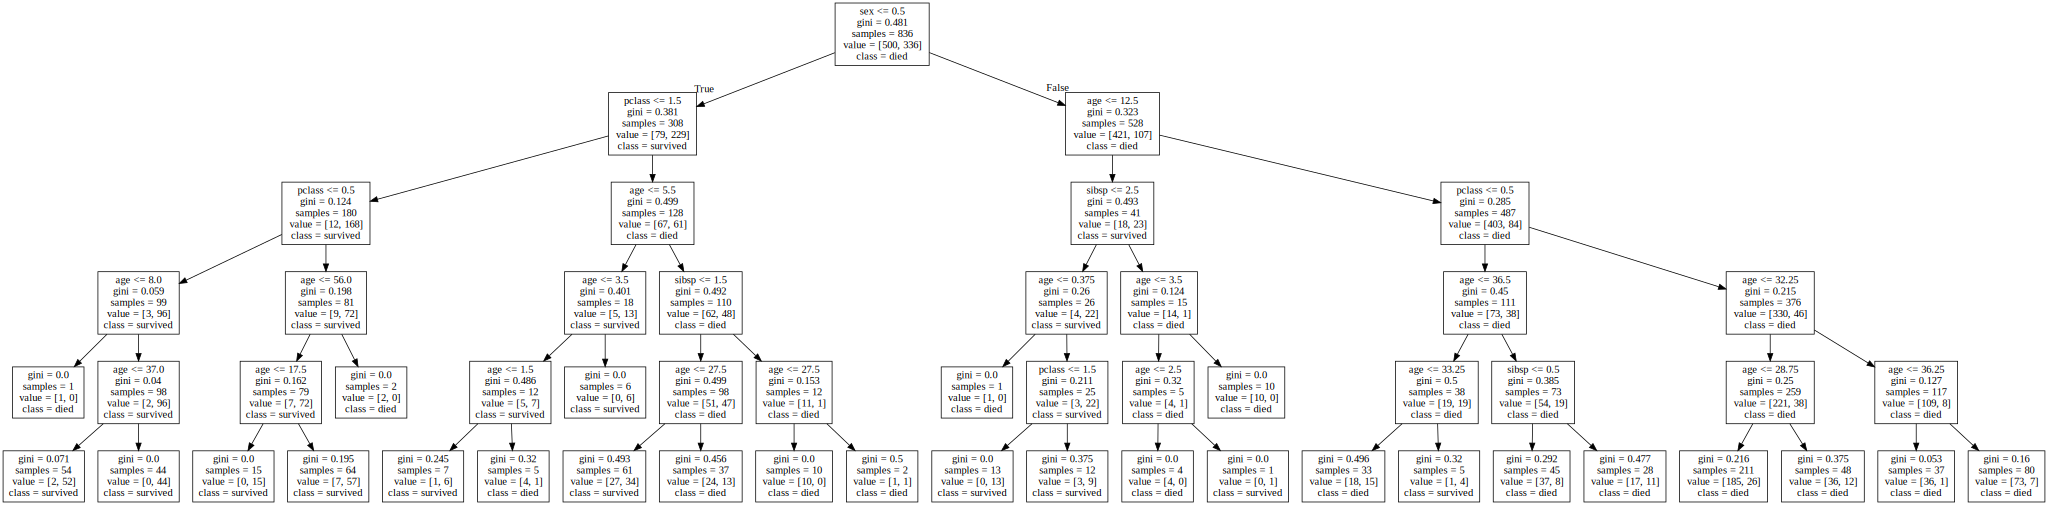

In [12]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))


#tree_representation_text = tree.export_text(clf, feature_names=feature_columns)
#print(tree_representation_text)

# alternate version of viewing the tree
tree_visualized = tree.export_graphviz(clf, feature_names=feature_columns, class_names=['died', 'survived'])

tree_visualized = graphviz.Source(tree_visualized, format="png")
tree_visualized


